In [28]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_mobilenet_v3_large', reco_arch='crnn_vgg16_bn', pretrained=True)


In [43]:
# Fungsi untuk mengambil semua kata dalam struktur data
model.det_predictor.model.postprocessor.bin_thresh = 0.1
model.det_predictor.model.postprocessor.box_thresh = 0.125
doc = DocumentFile.from_images("3.jpeg")
# Analyze
result = model(doc)
def extract_words(result):
    words = []
    for page in result['pages']:
        for block in page.blocks:
            for line in block.lines:
                for word in line.words:
                    words.append(word.value)
    return words
result1 = {'pages':result.pages}
# Mengambil semua kata dari hasil
words = extract_words(result1)
print(words)


['Saya', 'makan', 'nasi', 'Padang', 'bermingak', 'Sekali']


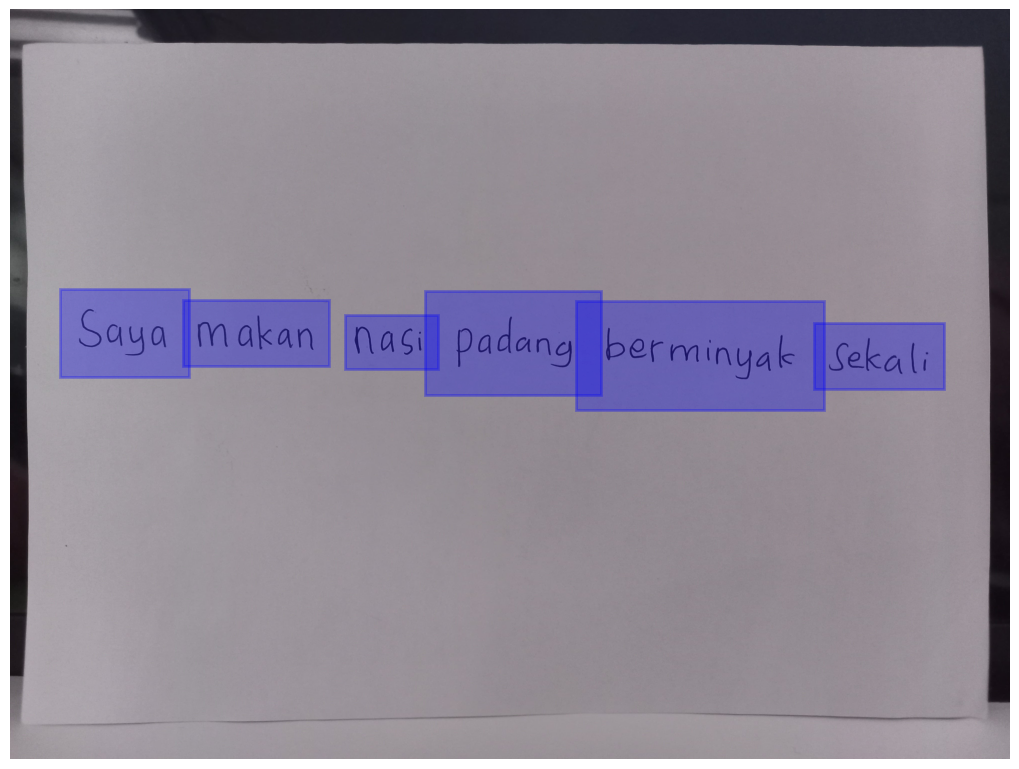

In [44]:
result.show()